In [1]:
# Site DJU
# https://www.statistiques.developpement-durable.gouv.fr/indice-de-rigueur-degres-jours-unifies-aux-niveaux-national-regional-et-departemental
 # site Zone Geo H1...    
# https://www.calculcee.fr/article/repartition-departements-francais-zones-climatiques/

In [2]:
from pathlib import Path
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DJU 

In [3]:
path_dju = r"U:\WORK\code_gpd\data_analysis\analysis_assembled_archetypes\Anova regression\dju-dep-1996-2021.xlsx"
dju = pd.read_excel(path_dju, header=3)
dju.set_index("Code département", inplace=True)
dju["mean"] = dju.mean(axis=1)
dju.head()

C:\Users\ldecarva\AppData\Local\Temp/ipykernel_18380/3809260031.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dju["mean"] = dju.mean(axis=1)


,Nom département,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
Code département,,,,,,,,,,,,,,,,,,,,,
01,AIN,2341.80,2151.50,2349.95,2228.15,2006.70,2132.70,1964.6,2270.30,2323.80,...,2400.05,1759.85,1998.25,2176.65,2138.70,1923.95,2091.85,1937.80,2359.20,2159.017308
02,AISNE,2741.30,2364.75,2394.05,2266.15,2170.90,2276.00,2139.8,2381.25,2405.10,...,2549.15,1923.25,2105.95,2355.00,2193.80,2143.55,2156.20,1946.90,2368.10,2277.661538
03,ALLIER,2367.55,2098.35,2304.40,2151.40,1965.70,2161.15,1929.2,2269.30,2312.70,...,2385.75,1794.20,2016.60,2233.00,2096.05,1886.10,1999.90,1789.55,2247.10,2137.478846
04,ALPES-DE-HAUTE-PROVENCE,2013.85,1736.50,2029.85,1976.75,1844.25,1797.50,1711.8,1989.75,1986.85,...,1955.75,1585.75,1681.50,1776.90,1735.65,1666.55,1728.35,1695.55,1901.95,1841.694231
05,HAUTES-ALPES,2537.35,2223.70,2497.45,2593.50,2410.90,2338.15,2258.5,2386.50,2472.40,...,2507.00,2125.40,2149.10,2342.45,2275.40,2179.70,2245.55,2080.00,2433.85,2355.130769


In [4]:
dep_dju_ = dju[["mean"]].dropna().to_dict()["mean"]

In [5]:
correct_0_keys = [dep[-1:] if dep.startswith('0') else dep for dep in dep_dju_.keys() ]

In [6]:
dep_dju = dict(zip(correct_0_keys, dep_dju_.values()))

### DPE

In [98]:
u_wall_min = 0.5
u_wall_max = 1.11
u_roof_min = 0.4
u_roof_max = 2.3

In [7]:
path = r"U:\WORK\assembled_same_U\with_complete_dpe_data\all\dpe_all3-len_185528-P3-P-HABITAT-FRANCE-toit.csv"

In [8]:
df = pd.read_csv(path, index_col=0)

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,50,51,52,53,54,55,56,57,75,127,128,130,172,199,205,222,248,250,251,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
cols = list(df.columns)

In [10]:
df.departement.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 23,
       24, 25, 26, 27, 28, '28', '2A', '2B', '30', 30, 31, 32, 33, 34, 36,
       38, 39, 40, 41, 42, 43, 45, 46, 47, 51, 52, 54, 55, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 12,
       19, 22, 29, 35, 37, 44, 48, 49, 50, 53, 56, 76], dtype=object)

In [11]:
type(df.departement.iloc[0])

int

In [12]:
df['departement'] = df['departement'].apply(str)
type(df.departement.iloc[0])

str

In [13]:
df["DJU"] = df["departement"].map(dep_dju)
df[["departement", "DJU"]].tail()

,departement,DJU
1995757,76,2188.682692
1995760,76,2188.682692
1995775,76,2188.682692
1995798,76,2188.682692
1995810,76,2188.682692


### Correlation 

In [14]:
df_data = df[['filosofi_part_proprietaire',
 'filosofi_part_pauvrete','DJU', 'adedpe202006_logtype_ph_u','adedpe202006_logtype_mur_u_ext']]

<AxesSubplot:>

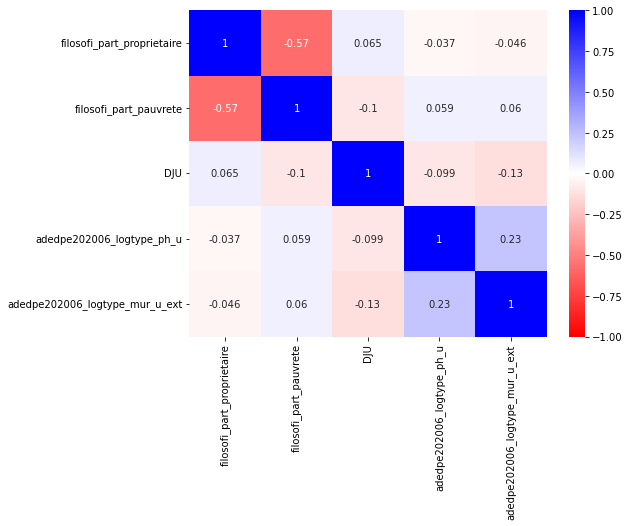

In [19]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(df_data.corr(method="pearson"), annot=True, fmt='.2g' , vmin=-1, vmax=1, cmap="bwr_r",)

### ANOVA 

In [29]:
from scipy.stats import f_oneway

'filosofi_part_proprietaire',
'filosofi_part_pauvrete',
'DJU', 
'adedpe202006_logtype_ph_u',
'adedpe202006_logtype_mur_u_ext']]

In [40]:
part_proprieté_lim = [0.5, 0.75, 0.98]
part_pauv_lim = [0.02, 0.18, 0.32]

In [58]:
pauv1 = df[df.filosofi_part_pauvrete < part_pauv_lim[0]].adedpe202006_logtype_mur_u_ext
pauv2 = df[(df.filosofi_part_pauvrete >= part_pauv_lim[0])&
          (df.filosofi_part_pauvrete < part_pauv_lim[1])].adedpe202006_logtype_mur_u_ext
pauv3 = df[(df.filosofi_part_pauvrete >= part_pauv_lim[1])&
          (df.filosofi_part_pauvrete < part_pauv_lim[2])].adedpe202006_logtype_mur_u_ext
pauv4 = df[df.filosofi_part_pauvrete >= part_pauv_lim[2]].adedpe202006_logtype_mur_u_ext

F_onewayResult(statistic=174.39865127082828, pvalue=6.480913023299696e-113)

In [89]:
from statsmodels.stats.diagnostic import normal_ad, kstest_fit
def check_normality(data):
    p_value = kstest_fit(data)[1]
    if p_value < 0.05:
            print('U values are not normally distributed')
    else:
            print('U values are normally distributed')

In [95]:
i=1
for pauv in [pauv1, pauv2, pauv3, pauv4]:
    print(f"\npauv{i}")
    print(f" len {len(pauv)}")
    print(f" mean {pauv.mean():.3f}")
    print(f" std {pauv.std():.3f}")
    check_normality(pauv)
    i+=1
    


pauv1
 len 37203
 mean 0.776
 std 0.463
U values are not normally distributed

pauv2
 len 128822
 mean 0.818
 std 0.491
U values are not normally distributed

pauv3
 len 16057
 mean 0.870
 std 0.526
U values are not normally distributed

pauv4
 len 2508
 mean 0.903
 std 0.523
U values are not normally distributed


In [94]:
from scipy.stats import levene
stat, p = levene(pauv1, pauv2, pauv3, pauv4)
p
# The small p-value suggests that the populations do not have equal variances.

2.750648767564483e-62

The criteria for using anova is not fullfilled, since the data is not normally distributed neither has homoscedasticity

In [60]:
F, p = f_oneway(pauv1, pauv2, pauv3, pauv4)
p

6.480913023299696e-113

Comme la valeur de p est inférieure à 0,05, l'hypothèse nulle, selon laquelle les moyennes sont égales, peut être vraisemblablement rejetée. C'est-à-dire que les variables qualitatives ont un effet significatif sur la variable quantitative : une moyenne au moins se distingue dans une large mesure au sein de l'échantillon.

Mais comme les critères de l'ANOVA ne sont pas respectés, cette analyse n'est pas fiable

### Chi square 

Check if the buildings considered renovated have the same frequences of part proprietaire than the population


In [102]:
df["renovated"] = df.adedpe202006_logtype_mur_u_ext < u_wall_min
df.head(2)

,archétype,période,typologie,usage,territoire,carte_territoire_P1,carte_territoire_P2_P7,typologie_mapuce,typologie_mapuce_sigle,typologie_méthode_bdnb,...,adedpe202006_logtype_s_hab,cerffo2020_nb_prop_gest,cerffo2020_nb_gest_pm,cerffo2020_nb_gest_bailleur,cerffo2020_nb_gest,filosofi_part_proprietaire,filosofi_part_pauvrete,geometry_BDNB,DJU,renovated
97,P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,...,108.0,2.0,NaN,NaN,NaN,0.740741,0.074074,"MULTIPOLYGON (((848435.3 6563026.1, 848445.2 6...",2159.017308,False
103,P3-P-HABITAT-FRANCE_TUILE,P3,P,HABITAT,FRANCE_TUILE,FRANCE_TERRE_TUILE,FRANCE_TUILE,NaN,NaN,P,...,89.0,2.0,NaN,NaN,NaN,0.908333,0.000000,"MULTIPOLYGON (((848519.9 6562673.5, 848521.3 6...",2159.017308,True


#### checking pauvreté

In [124]:
df.dropna(subset=["filosofi_part_pauvrete"], inplace=True)
part_pauv_lim = [0.02, 0.18, 0.32]
pauv_relations = {        
    "Pauv1": (df.filosofi_part_pauvrete < part_pauv_lim[0]),
    "Pauv2": ((df.filosofi_part_pauvrete >= part_pauv_lim[0])&
              (df.filosofi_part_pauvrete < part_pauv_lim[1])),
    "Pauv3": ((df.filosofi_part_pauvrete >= part_pauv_lim[1])&
              (df.filosofi_part_pauvrete < part_pauv_lim[2])),
    "Pauv4": (df.filosofi_part_pauvrete >= part_pauv_lim[2])    
                }

pauv_values = list(pauv_relations.keys())
pauv_conditions = list(pauv_relations.values())

df["class_pauv"] = np.select(pauv_conditions, pauv_values, default=None)

In [139]:
f_pop = df.class_pauv.value_counts() / len(df)
f_pop

Pauv2    0.697882
Pauv1    0.201544
Pauv3    0.086987
Pauv4    0.013587
Name: class_pauv, dtype: float64

In [141]:
df_ren = df[df.renovated == True]
f_ren = df_ren.class_pauv.value_counts() / len(df_ren)
f_ren

Pauv2    0.692864
Pauv1    0.216391
Pauv3    0.079815
Pauv4    0.010931
Name: class_pauv, dtype: float64

In [151]:
from scipy.stats import chisquare
chisquare(list(f_ren), f_exp=list(f_pop))

Power_divergenceResult(statistic=0.0022405827490472705, pvalue=0.9999718117324183)

**p-value >> 0.05 => do not reject the null hypothesis that the categorical data has the given frequencies.**
The frequency of the categories in the renovated group and population are similar

#### checking proprieté

In [152]:
df.dropna(subset=["filosofi_part_proprietaire"], inplace=True)
part_proprieté_lim = [0.5, 0.75, 0.98]
prop_relations = {        
    "Prop1": (df.filosofi_part_proprietaire < part_proprieté_lim[0]),
    "Prop2": ((df.filosofi_part_proprietaire >= part_proprieté_lim[0])&
              (df.filosofi_part_proprietaire < part_proprieté_lim[1])),
    "Prop3": ((df.filosofi_part_proprietaire >= part_proprieté_lim[1])&
              (df.filosofi_part_proprietaire < part_proprieté_lim[2])),
    "Prop4": (df.filosofi_part_proprietaire >= part_proprieté_lim[2])    
                }

prop_values = list(prop_relations.keys())
prop_conditions = list(prop_relations.values())

df["class_prop"] = np.select(prop_conditions, prop_values, default=None)

In [153]:
f_pop_prop = df.class_prop.value_counts() / len(df)
f_pop_prop

Prop3    0.632754
Prop2    0.192876
Prop1    0.091061
Prop4    0.083309
Name: class_prop, dtype: float64

In [155]:
df_ren_prop = df[df.renovated == True]
f_ren_prop = df_ren_prop.class_prop.value_counts() / len(df_ren_prop)
f_ren_prop

Prop3    0.637744
Prop2    0.186771
Prop4    0.092307
Prop1    0.083179
Name: class_prop, dtype: float64

In [156]:
from scipy.stats import chisquare
chisquare(list(f_ren_prop), f_exp=list(f_pop_prop))

Power_divergenceResult(statistic=0.0002498613179158019, pvalue=0.9999989496481795)

**p-value >> 0.05 => do not reject the null hypothesis that the categorical data has the given frequencies.**
The frequency of the categories in the renovated group and population are similar